In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

df3 = pd.read_csv ('/Users/pao.tovar/Downloads/atuscps_2019.csv')
df3.head()

,TUCASEID,TULINENO,GEREG,GEDIV,GESTFIPS,GTMETSTA,GTCBSA,GTCO,HEFAMINC,HEHOUSUT,...,PXPDEMP1,PXNMEMP1,PXPDEMP2,PXNMEMP2,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3
0,20190101190022,1,3,7,48,1,26420,0,6,1,...,0,0,0,0,2,-1,-1,20,0,0
1,20190101190031,1,2,3,26,1,24340,0,14,6,...,1,1,-1,-1,2,-1,-1,0,0,0
2,20190101190031,2,2,3,26,1,24340,0,14,6,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,20190101190031,3,2,3,26,1,24340,0,14,6,...,1,1,-1,-1,2,-1,-1,0,0,0
4,20190101190031,4,2,3,26,1,24340,0,14,6,...,1,1,-1,-1,2,-1,-1,42,0,0


In [2]:
sex = df3['PESEX'].dropna()

In [3]:
male = df3['PESEX'] == 1
female = df3['PESEX'] == 2

In [4]:
def function1(row):
    if row['PESEX'] == 1:
        return 'male'
    elif row['PESEX'] == 2:
        return 'female'

In [5]:
df3['PESEX'] = df3.apply(function1, axis=1)

In [6]:
status= df3['PENLFACT'].dropna()

In [7]:
def function2(row):
    if row['PENLFACT'] == 1:
        return 'Disability'
    elif row['PENLFACT'] == 2:
        return 'Ill'
    elif row['PENLFACT'] == 3:
        return 'School'
    elif row['PENLFACT'] == 4:
        return 'Taking care of h or f'
    elif row['PENLFACT'] == 5:
        return 'In retirement'
    elif row['PENLFACT'] == 6:
        return 'Something else/other'
    else:
        return 'NaN'

In [8]:
df3['PENLFACT'] = df3.apply(function2, axis=1)

In [9]:
table1 = pd.crosstab(index=df3["PENLFACT"], columns=df3["PESEX"])

In [10]:
table1

PESEX,female,male
PENLFACT,,
Disability,76,75
Ill,53,44
In retirement,18,19
NaN,28188,28246
School,1944,2105
Something else/other,180,272
Taking care of h or f,2760,305


In [11]:
table1 = table1.reindex(['Taking care of h or f','Disability', 'Ill', 'In retirement', 'School', 'Something else/other'])
table1

PESEX,female,male
PENLFACT,,
Taking care of h or f,2760,305
Disability,76,75
Ill,53,44
In retirement,18,19
School,1944,2105
Something else/other,180,272


In [12]:
table1.loc['Disability'] = table1.loc['Disability'] / sum(table1.loc['Disability'])
table1.loc['Ill'] = table1.loc['Ill'] / sum(table1.loc['Ill'])
table1.loc['In retirement'] = table1.loc['In retirement'] / sum(table1.loc['In retirement'])
table1.loc['School'] = table1.loc['School'] / sum(table1.loc['School'])
table1.loc['Something else/other'] = table1.loc['Something else/other'] / sum(table1.loc['Something else/other'])
table1.loc['Taking care of h or f'] = table1.loc['Taking care of h or f'] / sum(table1.loc['Taking care of h or f'])

In [13]:
table1.index

Index(['Taking care of h or f', 'Disability', 'Ill', 'In retirement', 'School',
       'Something else/other'],
      dtype='object', name='PENLFACT')

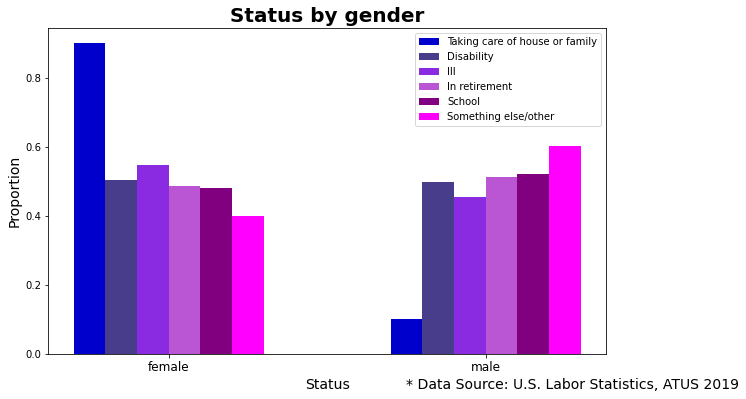

In [14]:
labels = ['female','male']
y_value1 = table1.loc['Taking care of h or f']
y_value2 = table1.loc['Disability']
y_value3 = table1.loc['Ill']
y_value4 = table1.loc['In retirement']
y_value5 = table1.loc['School']
y_value6 = table1.loc['Something else/other']

x = np.arange(len(labels))
width = 0.1  # the width of the bars
# I will change the width here to be a smaller number

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y_value1, width, color=['mediumblue'], label='Taking care of house or family')
ax.bar(x + width, y_value2, width, color=['darkslateblue'], label='Disability')
ax.bar(x + 2 * width, y_value3, width, color=['blueviolet'],label='Ill') # Notice that I added 2*width
ax.bar(x + 3 * width, y_value4, width, color=['mediumorchid'], label='In retirement') # I added 3*width
ax.bar(x + 4 * width, y_value5, width, color=['purple'], label='School')
ax.bar(x + 5 * width, y_value6, width, color=['magenta'],label='Something else/other')

ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Status', fontsize=14)
ax.set_title('Status by gender',
             fontsize=20, fontweight='bold')
ax.set_xticks(x + (5*width)/2) # Only change the number '4' to the number of values that you have
ax.legend()
ax.set_xticklabels(labels, fontsize=12)
plt.text(1,-0.1, "* Data Source: U.S. Labor Statistics, ATUS 2019", fontsize=14)
plt.show()

In [15]:
race= df3['PTDTRACE'].dropna()

In [16]:
race

0        2
1        1
2        1
3        1
4        1
        ..
64280    1
64281    1
64282    1
64283    1
64284    1
Name: PTDTRACE, Length: 64285, dtype: int64

In [17]:
def function3(row):
    if row['PTDTRACE'] == 1:
        return 'White only'
    elif row['PTDTRACE'] == 2:
        return 'Black only'
    elif row['PTDTRACE'] == 4:
        return 'Asian only'
    elif row['PTDTRACE'] == 3 or row['PTDTRACE'] == 5 or row['PTDTRACE'] == 6 or row['PTDTRACE'] ==7 or row['PTDTRACE'] ==8 or row['PTDTRACE'] ==8 or row['PTDTRACE'] ==9 or row['PTDTRACE'] ==10 or row['PTDTRACE'] == 11 or row['PTDTRACE'] ==12 or row['PTDTRACE'] ==13 or row['PTDTRACE'] ==14or row['PTDTRACE'] ==15 or row['PTDTRACE'] ==16 or row['PTDTRACE'] ==17 or row['PTDTRACE'] ==18 or row['PTDTRACE'] ==19 or row['PTDTRACE'] ==20 or row['PTDTRACE'] ==21 or row['PTDTRACE'] ==22 or row['PTDTRACE'] ==23 or row['PTDTRACE'] ==24 or row['PTDTRACE'] ==25 or row['PTDTRACE'] ==26:
        return 'Other'
    else:
        return 'NaN'

In [18]:
df3['PTDTRACE'] = df3.apply(function3, axis=1)

In [19]:
table2 = pd.crosstab(index=df3['PENLFACT'], columns=df3["PTDTRACE"])

In [20]:
table2

PTDTRACE,Asian only,Black only,Other,White only
PENLFACT,,,,
Disability,7,39,5,100
Ill,6,14,5,72
In retirement,5,4,3,25
NaN,2713,7858,2073,43790
School,285,591,189,2984
Something else/other,27,111,19,295
Taking care of h or f,258,320,98,2389


In [21]:
table2.index

Index(['Disability', 'Ill', 'In retirement', 'NaN', 'School',
       'Something else/other', 'Taking care of h or f'],
      dtype='object', name='PENLFACT')

In [22]:
table2.columns

Index(['Asian only', 'Black only', 'Other', 'White only'], dtype='object', name='PTDTRACE')

In [23]:
table2 = table2.reindex(index=['School','Taking care of h or f','Something else/other','Disability', 'Ill', 'In retirement',
                               ], columns=['Asian only', 'White only', 'Black only', 'Other'])

table2

PTDTRACE,Asian only,White only,Black only,Other
PENLFACT,,,,
School,285,2984,591,189
Taking care of h or f,258,2389,320,98
Something else/other,27,295,111,19
Disability,7,100,39,5
Ill,6,72,14,5
In retirement,5,25,4,3


In [24]:
table2['Asian only'] = table2['Asian only'] / sum(table2['Asian only'])
table2['Black only'] = table2['Black only'] / sum(table2['Black only'])
table2['Other'] = table2['Other'] / sum(table2['Other'])
table2['White only'] = table2['White only'] / sum(table2['White only'])

In [25]:
table2

PTDTRACE,Asian only,White only,Black only,Other
PENLFACT,,,,
School,0.484694,0.508781,0.547729,0.592476
Taking care of h or f,0.438776,0.407332,0.296571,0.307210
Something else/other,0.045918,0.050298,0.102873,0.059561
Disability,0.011905,0.017050,0.036145,0.015674
Ill,0.010204,0.012276,0.012975,0.015674
In retirement,0.008503,0.004263,0.003707,0.009404


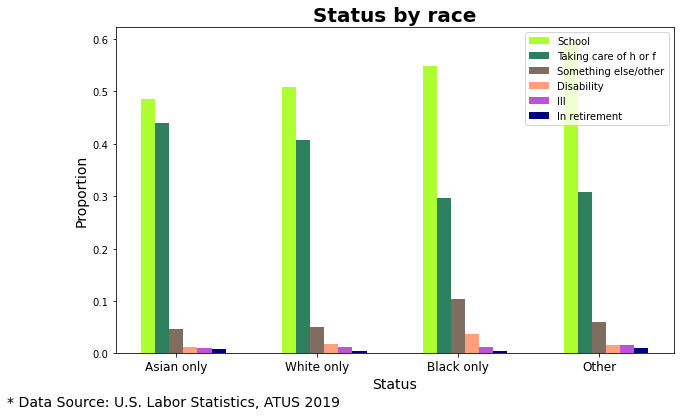

In [56]:
labels = ['Asian only', 'White only', 'Black only', 'Other']
y_value1 = table2.loc['School']
y_value2 = table2.loc['Taking care of h or f']
y_value3 = table2.loc['Something else/other']
y_value4 = table2.loc['Disability']
y_value5 = table2.loc['Ill']
y_value6 = table2.loc['In retirement']


x = np.arange(len(labels))
width = 0.1  # the width of the bars
# I will change the width here to be a smaller number

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y_value1, width, color='#ADFF2F', label='School')
ax.bar(x + width, y_value2, width, color='#2d7f5e', label='Taking care of h or f')
ax.bar(x + 2 * width, y_value3, width, color='#7f6d5f', label='Something else/other') # Notice that I added 2*width
ax.bar(x + 3 * width, y_value4, width, color='#FFA07A', label='Disability') # I added 3*width
ax.bar(x + 4 * width, y_value5, width, color='#BA55D3', label='Ill')
ax.bar(x + 5 * width, y_value6, width, color='#000080', label='In retirement')

ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Status', fontsize=14)
ax.set_title('Status by race',
             fontsize=20, fontweight='bold')
ax.set_xticks(x + (4*width)/2) # Only change the number '4' to the number of values that you have
ax.legend()
ax.set_xticklabels(labels, fontsize=12)
plt.text(-1,-0.1, "* Data Source: U.S. Labor Statistics, ATUS 2019", fontsize=14)
plt.show()

In [27]:
income= df3['HEFAMINC'].dropna()

In [28]:
def function3(row):
    if row['HEFAMINC'] ==1:
        return 'iLessthan5k'
    elif row['HEFAMINC'] == 2 or row['HEFAMINC'] == 3 or row['HEFAMINC'] == 4 or row['HEFAMINC'] ==  5:
        return 'i5kto15k'
    elif row['HEFAMINC'] == 6 or row['HEFAMINC'] == 7 or row['HEFAMINC'] == 8 or row['HEFAMINC'] == 9:
        return 'i15kto35k'
    elif row['HEFAMINC'] == 10 or row['HEFAMINC'] == 11 or row['HEFAMINC'] == 12:
        return 'i35kto60k'
    elif row['HEFAMINC'] == 13:
        return 'i60Kto75k'
    elif row['HEFAMINC'] == 14:
        return 'i75Kto100k'
    elif row['HEFAMINC'] == 15 or row['HEFAMINC'] == 16:
        return 'i100kandover'
    else:
        return 'NaN'

In [29]:
df3['HEFAMINC'] = df3.apply(function3, axis=1)

In [30]:
table3 = pd.crosstab(index=df3["PENLFACT"], columns=df3["HEFAMINC"])

In [31]:
table3

HEFAMINC,i100kandover,i15kto35k,i35kto60k,i5kto15k,i60Kto75k,i75Kto100k,iLessthan5k
PENLFACT,,,,,,,
Disability,11,41,34,30,16,11,8
Ill,18,24,23,12,9,5,6
In retirement,8,6,5,5,7,5,1
NaN,16403,9864,11867,3727,6040,7471,1062
School,1267,707,764,277,391,503,140
Something else/other,87,96,109,36,47,50,27
Taking care of h or f,703,662,697,250,306,341,106


In [32]:
table3.index

Index(['Disability', 'Ill', 'In retirement', 'NaN', 'School',
       'Something else/other', 'Taking care of h or f'],
      dtype='object', name='PENLFACT')

In [33]:
table3 = table3.reindex(index=['Taking care of h or f','Disability', 'Ill', 'In retirement', 'School',
                               'Something else/other'],columns=['iLessthan5k','i5kto15k', 'i15kto35k', 'i35kto60k', 'i60Kto75k', 'i75Kto100k',  'i100kandover'])
table3

HEFAMINC,iLessthan5k,i5kto15k,i15kto35k,i35kto60k,i60Kto75k,i75Kto100k,i100kandover
PENLFACT,,,,,,,
Taking care of h or f,106,250,662,697,306,341,703
Disability,8,30,41,34,16,11,11
Ill,6,12,24,23,9,5,18
In retirement,1,5,6,5,7,5,8
School,140,277,707,764,391,503,1267
Something else/other,27,36,96,109,47,50,87


In [34]:
table3.loc['Disability'] = table3.loc['Disability'] / sum(table3.loc['Disability'])
table3.loc['Ill'] = table3.loc['Ill'] / sum(table3.loc['Ill'])
table3.loc['In retirement'] = table3.loc['In retirement'] / sum(table3.loc['In retirement'])
table3.loc['School'] = table3.loc['School'] / sum(table3.loc['School'])
table3.loc['Something else/other'] = table3.loc['Something else/other'] / sum(table3.loc['Something else/other'])
table3.loc['Taking care of h or f'] = table3.loc['Taking care of h or f'] / sum(table3.loc['Taking care of h or f'])

In [35]:
table3

HEFAMINC,iLessthan5k,i5kto15k,i15kto35k,i35kto60k,i60Kto75k,i75Kto100k,i100kandover
PENLFACT,,,,,,,
Taking care of h or f,0.034584,0.081566,0.215987,0.227406,0.099837,0.111256,0.229364
Disability,0.052980,0.198675,0.271523,0.225166,0.105960,0.072848,0.072848
Ill,0.061856,0.123711,0.247423,0.237113,0.092784,0.051546,0.185567
In retirement,0.027027,0.135135,0.162162,0.135135,0.189189,0.135135,0.216216
School,0.034576,0.068412,0.174611,0.188689,0.096567,0.124228,0.312917
Something else/other,0.059735,0.079646,0.212389,0.241150,0.103982,0.110619,0.192478


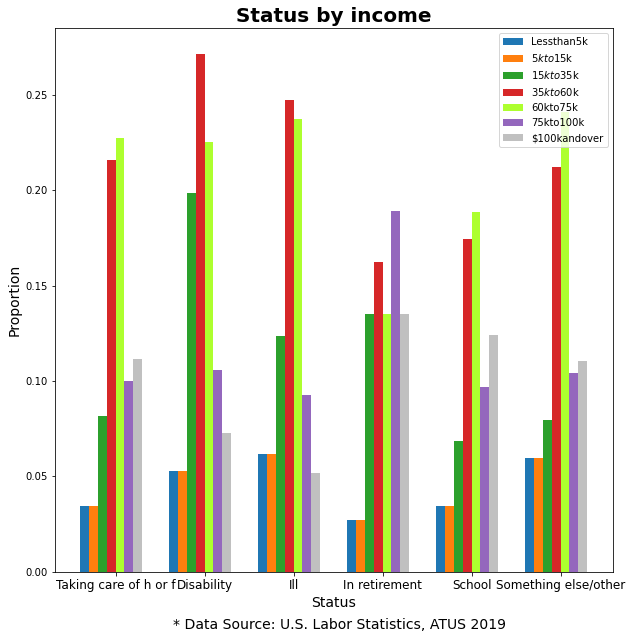

In [36]:
labels = ['Taking care of h or f', 'Disability','Ill', 'In retirement' , 'School','Something else/other']
y_value1 = table3['iLessthan5k']
y_value2 = table3['i5kto15k']
y_value3 = table3['i15kto35k']
y_value4 = table3['i35kto60k']
y_value5 = table3['i60Kto75k']
y_value6 = table3['i75Kto100k']
y_value7 = table3['i100kandover']

 
x = np.arange(len(labels))
width = 0.1  # the width of the bars
# I will change the width here to be a smaller number

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x, y_value1, width, label='Lessthan5k')
ax.bar(x +  width, y_value1, width, label='$5kto$15k')
ax.bar(x + 2 * width, y_value2, width, label='$15kto$35k')
ax.bar(x + 3 * width, y_value3, width, label= '$35kto$60k')                
ax.bar(x + 4 * width, y_value4, width,color='#ADFF2F', label='60kto75k') 
ax.bar(x + 5 * width, y_value5, width, label='75kto100k')
ax.bar(x + 6 * width, y_value6, width, color='#C0C0C0',label='$100kandover')

ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Status', fontsize=14)
ax.set_title('Status by income',
             fontsize=20, fontweight='bold')
ax.set_xticks(x + (7*width)/2) # Only change the number '4' to the number of values that you have
ax.legend()
ax.set_xticklabels(labels, fontsize=12)
plt.text(1,-0.03, "* Data Source: U.S. Labor Statistics, ATUS 2019", fontsize=14)
plt.show()

In [37]:
age_df3 = df3['PRTAGE'].dropna()

In [38]:
table4 = pd.crosstab(index=df3["HEFAMINC"], columns=df3["PRTAGE"])

In [39]:
table4

PRTAGE,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,85
HEFAMINC,,,,,,,,,,,,,,,,,,,,,
i100kandover,207,257,264,289,293,311,303,337,311,322,...,88,66,59,64,41,40,38,28,118,100
i15kto35k,113,143,152,163,163,169,160,174,199,183,...,125,114,106,86,101,88,89,82,316,338
i35kto60k,135,167,168,162,187,202,200,192,233,231,...,114,89,90,99,98,71,72,90,267,267
i5kto15k,46,62,57,53,73,65,61,58,56,66,...,62,49,45,42,32,34,41,29,158,168
i60Kto75k,66,81,99,85,116,113,102,112,93,100,...,56,41,37,44,39,32,21,19,92,71
i75Kto100k,85,114,117,130,125,119,137,123,137,126,...,55,40,34,31,30,32,20,24,79,78
iLessthan5k,8,27,30,20,26,30,23,21,19,18,...,7,7,2,4,5,4,5,8,10,14


In [40]:
table4 = table4.reindex(index=['iLessthan5k','i5kto15k', 'i15kto35k', 'i35kto60k', 'i60Kto75k', 'i75Kto100k',  'i100kandover'])
table4

PRTAGE,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,85
HEFAMINC,,,,,,,,,,,,,,,,,,,,,
iLessthan5k,8,27,30,20,26,30,23,21,19,18,...,7,7,2,4,5,4,5,8,10,14
i5kto15k,46,62,57,53,73,65,61,58,56,66,...,62,49,45,42,32,34,41,29,158,168
i15kto35k,113,143,152,163,163,169,160,174,199,183,...,125,114,106,86,101,88,89,82,316,338
i35kto60k,135,167,168,162,187,202,200,192,233,231,...,114,89,90,99,98,71,72,90,267,267
i60Kto75k,66,81,99,85,116,113,102,112,93,100,...,56,41,37,44,39,32,21,19,92,71
i75Kto100k,85,114,117,130,125,119,137,123,137,126,...,55,40,34,31,30,32,20,24,79,78
i100kandover,207,257,264,289,293,311,303,337,311,322,...,88,66,59,64,41,40,38,28,118,100


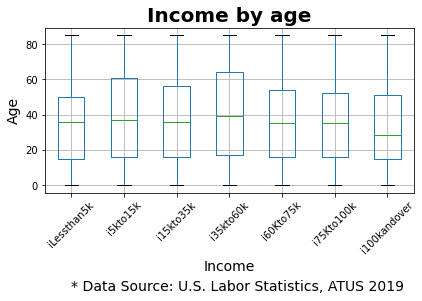

In [73]:
# groupby 
by_income = df3[["HEFAMINC", "PRTAGE"]].groupby("HEFAMINC")

# boxplot

fig, ax = plt.subplots(1, 1)
by_income.boxplot(subplots=False, ax=ax)
ax.set_xticklabels(list(table4.index), rotation=45)
ax.set_title('Income by age',
             fontsize=20, fontweight='bold')
ax.set_ylabel('Age', fontsize=14)
ax.set_xlabel('Income', fontsize=14)

plt.tight_layout()

plt.text(1,-60, "* Data Source: U.S. Labor Statistics, ATUS 2019", fontsize=14)
plt.show()

In [42]:
maritalstatus= df3['PEMARITL'].dropna()

In [43]:
maritalstatus

0        3
1        6
2       -1
3        6
4        2
        ..
64280   -1
64281    4
64282   -1
64283   -1
64284    6
Name: PEMARITL, Length: 64285, dtype: int64

In [44]:
def function5(row):
    if row['PEMARITL'] == 1:
        return 'Married-spousep'
    elif row['PEMARITL'] == 2:
        return 'Married-spousea'
    elif row['PEMARITL'] == 3:
        return 'Widowed'
    elif row['PEMARITL'] == 4:
        return 'Divorced'
    elif row['PEMARITL'] == 5:
        return 'Separated'
    elif row['PEMARITL'] == 6:
        return 'Never_married'
    else:
        return 'NaN'

In [45]:
df3['PEMARITL'] = df3.apply(function5, axis=1)

In [46]:
table5  = pd.crosstab(index=df3["PENLFACT"], columns=df3["PEMARITL"])

In [47]:
table5

PEMARITL,Divorced,Married-spousea,Married-spousep,NaN,Never_married,Separated,Widowed
PENLFACT,,,,,,,
Disability,29,2,43,0,52,10,15
Ill,15,1,37,0,38,5,1
In retirement,6,0,19,0,7,1,4
NaN,4618,666,22319,14823,10368,919,2721
School,37,55,120,0,3799,32,6
Something else/other,36,5,124,0,268,7,12
Taking care of h or f,117,34,2222,0,602,56,34


In [48]:
table5['Divorced_per'] = table5['Divorced'] / sum(table5['Divorced'])
table5['Married-spousea_per'] = table5['Married-spousea'] / sum(table5['Married-spousea'])
table5['Married-spousep_per'] = table5['Married-spousep'] / sum(table5['Married-spousep'])
table5['Never_married_per'] = table5['Never_married'] / sum(table5['Never_married'])
table5['Separated_per'] = table5['Separated'] / sum(table5['Separated'])
table5['Widowed_per'] = table5['Widowed'] / sum(table5['Widowed'])

In [49]:
table5.loc['Disability_per'] = table5.loc['Disability'] / sum(table5.loc['Disability'])
table5.loc['Ill_per'] = table5.loc['Ill'] / sum(table5.loc['Ill'])
table5.loc['In retirement_per'] = table5.loc['In retirement'] / sum(table5.loc['In retirement'])
table5.loc['School_per'] = table5.loc['School'] / sum(table5.loc['School'])
table5.loc['Something else/other_per'] = table5.loc['Something else/other'] / sum(table5.loc['Something else/other'])
table5.loc['Taking care of h or f_per'] = table5.loc['Taking care of h or f'] / sum(table5.loc['Taking care of h or f'])

In [50]:
table5.index

Index(['Disability', 'Ill', 'In retirement', 'NaN', 'School',
       'Something else/other', 'Taking care of h or f', 'Disability_per',
       'Ill_per', 'In retirement_per', 'School_per',
       'Something else/other_per', 'Taking care of h or f_per'],
      dtype='object', name='PENLFACT')

In [51]:
table5.columns

Index(['Divorced', 'Married-spousea', 'Married-spousep', 'NaN',
       'Never_married', 'Separated', 'Widowed', 'Divorced_per',
       'Married-spousea_per', 'Married-spousep_per', 'Never_married_per',
       'Separated_per', 'Widowed_per'],
      dtype='object', name='PEMARITL')

In [52]:
table5 = table5.reindex(index=['Taking care of h or f_per','Disability_per', 'Ill_per', 'In retirement_per', 'School_per',
                          'Something else/other_per'],columns=['Married-spousep_per','Never_married_per'
                                                           ,'Divorced_per','Separated_per','Widowed_per',
                                                               'Married-spousea_per'])
table5

PEMARITL,Married-spousep_per,Never_married_per,Divorced_per,Separated_per,Widowed_per,Married-spousea_per
PENLFACT,,,,,,
Taking care of h or f_per,0.000029,0.000013,0.000008,0.000018,3.971367e-06,0.000015
Disability_per,0.000011,0.000023,0.000040,0.000064,3.555989e-05,0.000017
Ill_per,0.000015,0.000026,0.000032,0.000050,3.690595e-06,0.000014
In retirement_per,0.000021,0.000012,0.000033,0.000026,3.870172e-05,0.000000
School_per,0.000001,0.000062,0.000002,0.000008,5.305093e-07,0.000018
Something else/other_per,0.000011,0.000039,0.000016,0.000015,9.504428e-06,0.000014


In [53]:
table5.columns

Index(['Married-spousep_per', 'Never_married_per', 'Divorced_per',
       'Separated_per', 'Widowed_per', 'Married-spousea_per'],
      dtype='object', name='PEMARITL')

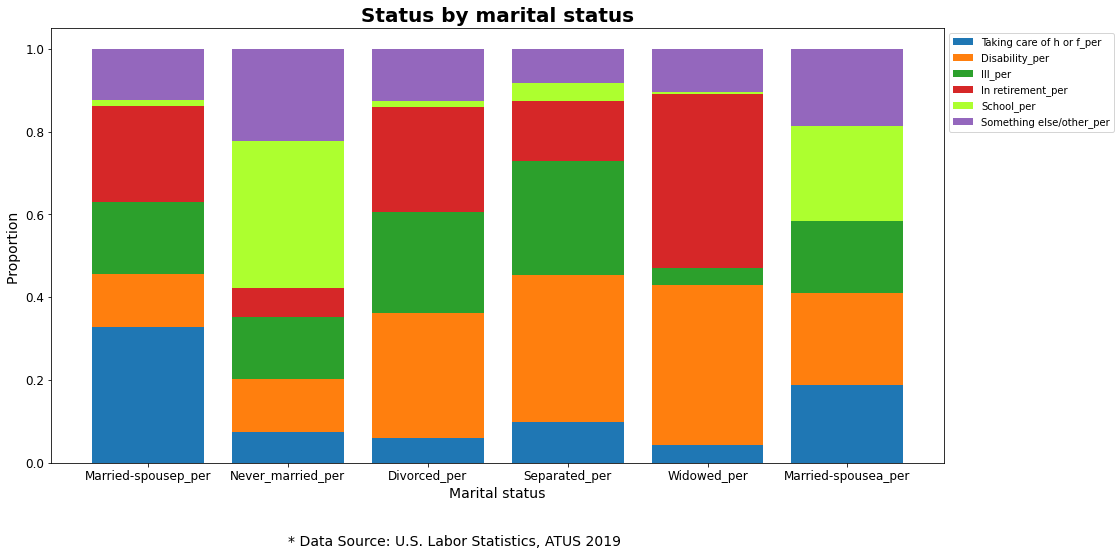

In [54]:
label = ['Married-spousep_per','Never_married_per','Divorced_per','Separated_per','Widowed_per','Married-spousea_per']

y_value1 = table5.loc['Taking care of h or f_per']
y_value2 = table5.loc['Disability_per']
y_value3 = table5.loc['Ill_per']
y_value4 = table5.loc['In retirement_per']
y_value5 = table5.loc['School_per']
y_value6 = table5.loc['Something else/other_per']

# lines I added
y_all = np.array([y_value1, y_value2, y_value3, y_value4, y_value5, y_value6])
y_all /= y_all.sum(axis=0, keepdims=True)
y_value1, y_value2, y_value3, y_value4, y_value5, y_value6 = y_all
# end lines I added

fig, axs = plt.subplots(figsize=(16,8)) # Change the figure size here      
p1 = axs.bar(label, y_value1)    
p2 = axs.bar(label, y_value2, bottom=y_value1)
p3 = axs.bar(label, y_value3, bottom=y_value1+y_value2)
p4 = axs.bar(label, y_value4, bottom=y_value1+y_value2+y_value3)
p5 = axs.bar(label, y_value5,color='#ADFF2F', bottom=y_value1+y_value2+y_value3+y_value4)
p6 = axs.bar(label, y_value6, bottom=y_value1+y_value2+y_value3+y_value4+y_value5)

axs.set_title("Status by marital status",
              fontsize=20, fontweight="bold")  
axs.set_xlabel("Marital status", fontsize=14)
axs.set_ylabel("Proportion ", fontsize=14)
axs.tick_params(labelsize=12)  
axs.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]),(table5.index), bbox_to_anchor=(1, 1))
plt.text(1,-0.2, "* Data Source: U.S. Labor Statistics, ATUS 2019", fontsize=14)
# make sure to add p here, if you would like to add more bars

plt.show()